# IMPACT OF COVID-19 ON IT STOCKS IN 2020

In [1]:
from nsepy import get_history
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [32]:
from_date = datetime.datetime(2020,1,1)
to_date = datetime.datetime(2020,4,30)

In [3]:
Infosys = get_history(symbol = 'INFY',start = from_date,end = to_date)

Wipro = get_history(symbol = 'WIPRO',start = from_date,end = to_date)

TCS = get_history(symbol = 'TCS',start = from_date,end = to_date)

Tech_Mahindra = get_history(symbol = 'TECHM',start = from_date,end = to_date)

HCL_Tech = get_history(symbol = 'HCLTECH',start = from_date,end = to_date)

Mindtree = get_history(symbol = 'MINDTREE',start = from_date,end = to_date) 

Hexaware_Tech = get_history(symbol = 'HEXAWARE',start = from_date,end = to_date) 


In [4]:
tickers = ['INFY','WIPRO','TCS','TECHM','HCLTECH' , 'MINDTREE', 'HEXAWARE']

In [5]:
IT_stocks = pd.concat([Infosys, Wipro, TCS, Tech_Mahindra, HCL_Tech, Mindtree, Hexaware_Tech],axis=1,keys=tickers)

In [6]:
IT_stocks.columns.names = ['IT Ticker','Stock Info']

In [7]:
IT_stocks.tail()

IT Ticker    INFY                                                           \
Stock Info Symbol Series Prev Close    Open   High     Low    Last   Close   
Date                                                                         
2020-04-24   INFY     EQ     679.30  668.55  675.0  654.80  660.95  658.00   
2020-04-27   INFY     EQ     658.00  661.05  681.0  661.05  665.10  664.60   
2020-04-28   INFY     EQ     664.60  673.00  677.0  653.05  664.05  660.70   
2020-04-29   INFY     EQ     660.70  666.00  682.0  658.00  678.00  676.55   
2020-04-30   INFY     EQ     676.55  700.00  720.0  698.10  715.05  715.50   

IT Ticker                     ... HEXAWARE                               \
Stock Info    VWAP    Volume  ...     High    Low   Last  Close    VWAP   
Date                          ...                                         
2020-04-24  662.50   7319950  ...   282.50  262.0  279.0  279.9  274.91   
2020-04-27  670.63   7183316  ...   293.00  282.0  289.6  289.2  289.44   
2020-04-28  659.88   7296594  ...   295.00  280.0  289.0  284.9  286.23   
2020-04-29  671.94   8639246  ...   306.45  283.0  295.8  295.9  297.55   
2020-04-30  711.47  16254036  ...   301.80  276.1  279.9  279.7  283.52   

IT Ticker                                                                
Stock Info   Volume      Turnover Trades Deliverable Volume %Deliverble  
Date                                                                     
2020-04-24   133435  3.668222e+12   4541              75259      0.5640  
2020-04-27   337565  9.770468e+12   7955              87189      0.2583  
2020-04-28   325084  9.304982e+12  10757             185363      0.5702  
2020-04-29  3639891  1.083055e+14  67933             525186      0.1443  
2020-04-30  1865466  5.289039e+13  44591             686976      0.3683  

[5 rows x 98 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each IT stock throughout the time period?**

In [8]:
IT_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

IT Ticker
INFY         800.45
WIPRO        257.20
TCS         2255.25
TECHM        840.90
HCLTECH      621.65
MINDTREE    1050.30
HEXAWARE     386.95
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each IT stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [9]:
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick + ' returns'] = IT_stocks[tick]['Close'].pct_change()

returns.head()

,INFY returns,WIPRO returns,TCS returns,TECHM returns,HCLTECH returns,MINDTREE returns,HEXAWARE returns
Date,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.002918,0.002422,-0.004590,0.005183,0.002797,0.002464,0.003719
2020-01-03,0.015380,0.011277,0.019929,0.011814,0.020051,0.002212,-0.005039
2020-01-06,-0.009584,0.004182,-0.000091,-0.006064,-0.005213,0.010484,-0.002979
2020-01-07,-0.014820,0.012096,0.002454,0.008697,0.003866,0.026878,0.000149


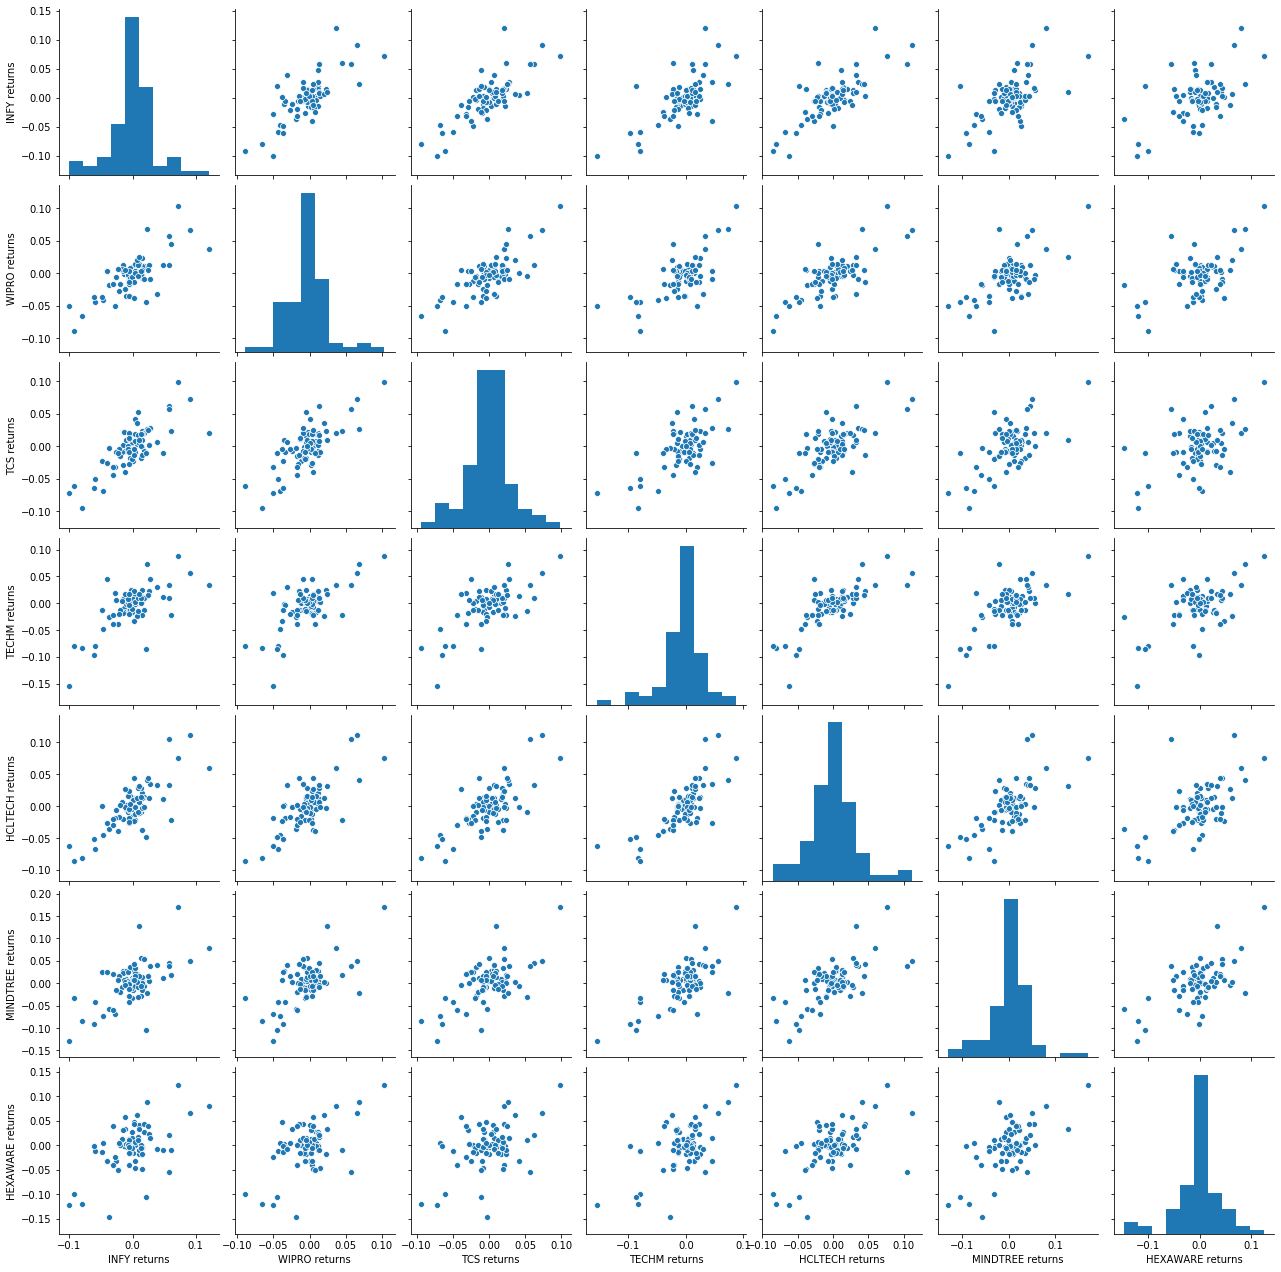

In [11]:
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each IT stock had the best and worst single day returns. **

In [12]:
returns.idxmin()

INFY returns        2020-03-23
WIPRO returns       2020-03-16
TCS returns         2020-03-12
TECHM returns       2020-03-23
HCLTECH returns     2020-03-16
MINDTREE returns    2020-03-23
HEXAWARE returns    2020-03-18
dtype: object

In [13]:
returns.idxmax()

INFY returns        2020-03-24
WIPRO returns       2020-03-20
TCS returns         2020-03-20
TECHM returns       2020-03-20
HCLTECH returns     2020-04-07
MINDTREE returns    2020-03-20
HEXAWARE returns    2020-03-20
dtype: object

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? risk in April month?

In [14]:
returns.std()

INFY returns        0.034412
WIPRO returns       0.028271
TCS returns         0.030879
TECHM returns       0.035405
HCLTECH returns     0.033581
MINDTREE returns    0.043238
HEXAWARE returns    0.043203
dtype: float64

In [15]:
returns.reset_index()['Date']

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-06
4     2020-01-07
         ...    
77    2020-04-24
78    2020-04-27
79    2020-04-28
80    2020-04-29
81    2020-04-30
Name: Date, Length: 82, dtype: object

In [16]:
returns.reset_index()[64:].head()

,Date,INFY returns,WIPRO returns,TCS returns,TECHM returns,HCLTECH returns,MINDTREE returns,HEXAWARE returns
64,2020-04-01,-0.060327,-0.036604,-0.064263,-0.096021,-0.052360,-0.090745,-0.001323
65,2020-04-03,-0.028368,-0.050132,-0.031924,0.018975,-0.018740,-0.069542,-0.024293
66,2020-04-07,0.091002,0.066111,0.073147,0.055577,0.111755,0.049422,0.066999
67,2020-04-08,-0.011581,0.005211,-0.039291,0.016459,0.026488,-0.004961,0.057913
68,2020-04-09,0.007362,0.019699,0.035592,-0.024423,0.012848,0.002254,0.062964


In [17]:
returns[64:].std()

INFY returns        0.037421
WIPRO returns       0.030799
TCS returns         0.039845
TECHM returns       0.035891
HCLTECH returns     0.045921
MINDTREE returns    0.050648
HEXAWARE returns    0.039004
dtype: float64

** Create a distplot & barplot using seaborn of the march returns for TCS **

In [18]:
returns.reset_index()[43:64].head()

,Date,INFY returns,WIPRO returns,TCS returns,TECHM returns,HCLTECH returns,MINDTREE returns,HEXAWARE returns
43,2020-03-02,0.012778,-0.002935,0.000575,0.000202,0.028726,0.057309,0.001391
44,2020-03-03,0.008029,0.013134,0.017439,0.010409,0.027924,-0.009067,0.016111
45,2020-03-04,0.015730,0.023022,0.023082,0.025256,-0.003451,0.001466,-0.017906
46,2020-03-05,-0.005470,0.003714,0.020089,-0.019707,0.023619,-0.029177,-0.039248
47,2020-03-06,-0.020739,-0.026774,-0.004047,-0.020764,-0.017696,0.016639,0.005505


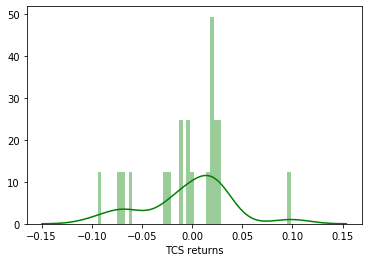

In [19]:
sns.distplot(returns.reset_index()[43:64]['TCS returns'],color='green',bins=50)

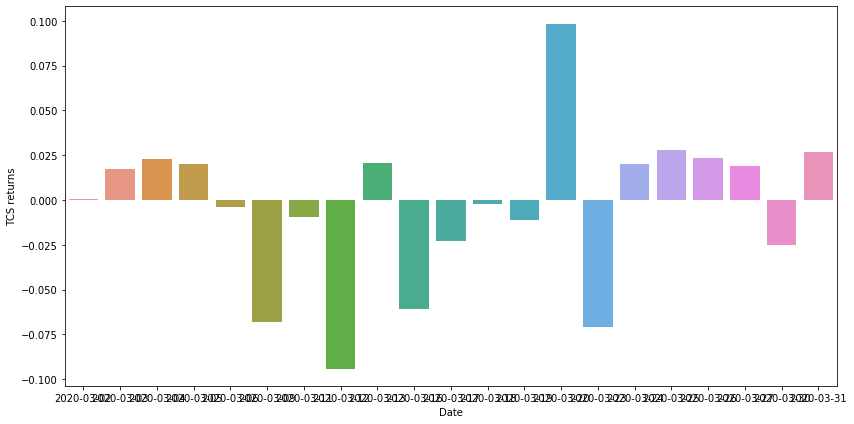

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x = returns.reset_index()[43:64]['Date'] , y = returns.reset_index()['TCS returns'] , data = returns)

plt.tight_layout()

** Create a distplot using seaborn of the entire series returns for wipro **

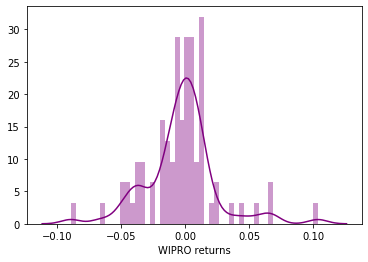

In [21]:
sns.distplot(returns.reset_index()['WIPRO returns'],color='purple',bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

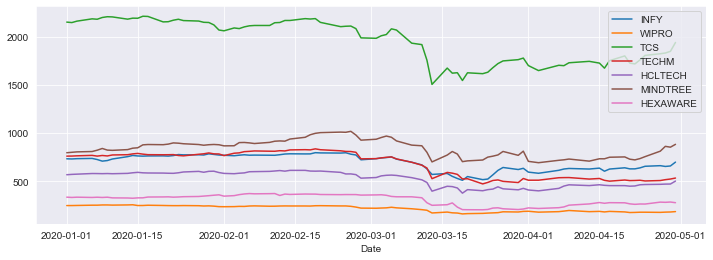

In [23]:
for tick in tickers:    #method 1
    IT_stocks[tick]['Low'].plot(figsize=(12,4),label=tick)
plt.legend()

In [24]:
IT_stocks.xs(key='Low',axis=1,level='Stock Info',).iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

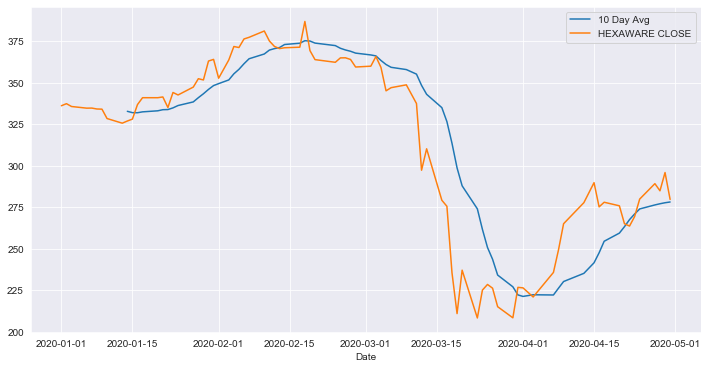

In [25]:
plt.figure(figsize=(12,6))
IT_stocks['HEXAWARE']['Close'].rolling(window=10).mean().plot(label='10 Day Avg')
IT_stocks['HEXAWARE']['Close'].plot(label='HEXAWARE CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

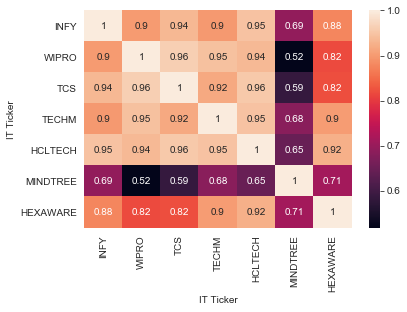

In [26]:
sns.heatmap(IT_stocks.xs(key='High',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

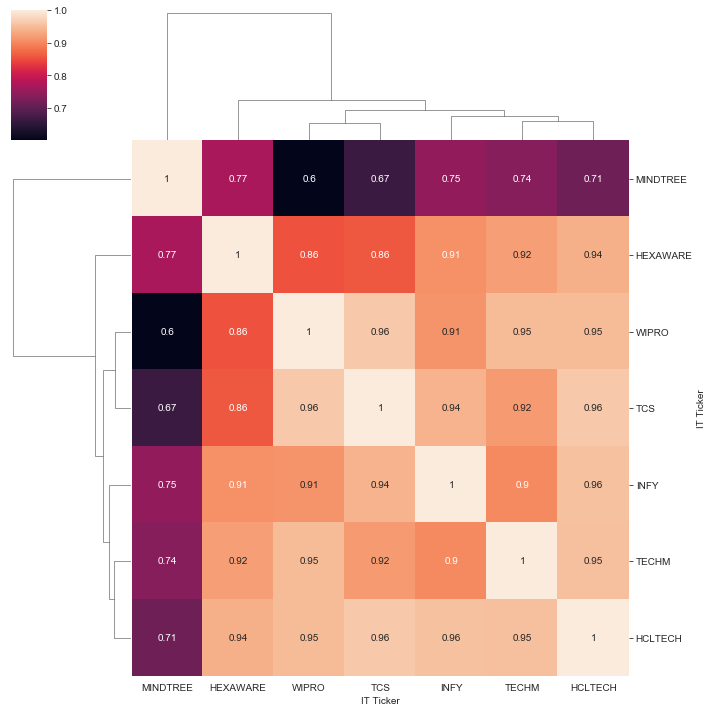

In [27]:
sns.clustermap(IT_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [28]:
close_corr = IT_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of TCS**

In [29]:
IT_stocks.TCS[['Open', 'High', 'Low', 'Close']].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Tech Mahindra**

In [30]:
IT_stocks['TECHM']['Close'].ta_plot(study='sma',periods=[10,20,30],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Mindtree.**

In [31]:
IT_stocks.MINDTREE['Close'].ta_plot(study='boll')